<a href="https://colab.research.google.com/github/Kornshnaps/Support_aut_nlp/blob/master/NLMK_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cv2
import numpy as np
#data = pd.read_csv('D:\\whales\\train.csv')
import io
from google.colab import drive
drive.mount('/content/drive')#,force_remount=True)
#data = pd.read_csv('drive/My Drive/Colab Notebooks/train.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator
import keras.utils

Using TensorFlow backend.


In [0]:
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import skimage.io
from skimage import color
from skimage import io
import glob
import cv2
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import skimage

In [0]:
#taken from: https://www.kaggle.com/bguberfain/elastic-transform-for-data-augmentation
# Function to distort image
def elastic_transform(image, alpha, sigma, alpha_affine, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    shape_size = shape[:2]
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    return map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

In [0]:

def draw_grid(im, grid_size):
    # Draw grid lines
    for i in range(0, im.shape[1], grid_size):
        cv2.line(im, (i, 0), (i, im.shape[0]), color=(1,))
    for j in range(0, im.shape[0], grid_size):
        cv2.line(im, (0, j), (im.shape[1], j), color=(1,))

In [0]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving image_slicing.py to image_slicing.py


59.0 130.0
--- [0, 150, 300]
--- [0, 150]
--- [0, 221, 442, 663, 884, 1105, 1326, 1547, 1768, 1989]
--- [0, 221, 442, 663, 884, 1105, 1326, 1547, 1768]
130 59
[0, 150] [0, 221, 442, 663, 884, 1105, 1326, 1547, 1768]
(430, 2048)


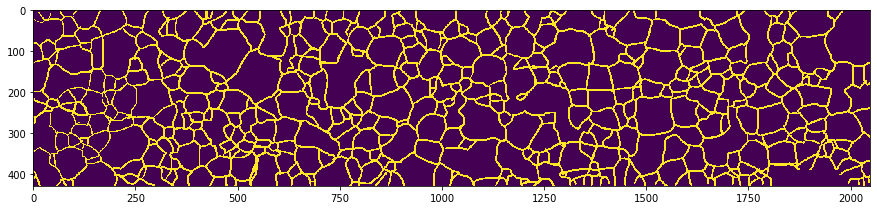

In [0]:
from PIL import Image
import cv2
from google.colab import files
#src = list(files.upload().values())[0]
#

from image_slicing import Image_slicer
h,w = 280,280
W, H = 430, 2048
img = np.array(Image.open('drive/My Drive/Colab Notebooks/NLMKCollab/test_y/'+'16.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img,(H,W))
ret,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
Im = Image_slicer(overW=70,overH=40,newH = h,newW = w,area = 0.0,H = 430,W =2048)
print(img.shape)
plt.figure(figsize=(15,15))
plt.imshow(img)

18


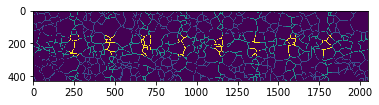

In [0]:
k = Im.get_slices_batch(img)
united = Im.unite_img(k['images'])
plt.imshow(united)
print(len(k['images']))
#plt.imshow(k['images'][5])

In [0]:

from PIL import Image
a  = [16,17,18,19,20]
train_x = []
train_y = []
path = 'drive/My Drive/Colab Notebooks/NLMKCollab/'
for i in range(len(a)):
    img = np.array(Image.open(path+'test1_x/'+str(a[i])+'.jpg'))
    img = cv2.resize(img,(H,W))
    print('i',i,img.shape)
    img = image.img_to_array(img)
    #img = image.img_to_array(img)
    k = Im.get_slices_batch(img)
    train_x.extend(k['images'])
    img1 =  np.array(Image.open(path+'test_y/'+str(a[i])+'.jpg'))
    gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray,(H,W))
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #img1 = image.img_to_array(img1)
    thresh = image.img_to_array(thresh/255)
    #thresh = np.expand_dims(thresh, axis=-1)
    k = Im.get_slices_batch(thresh)
    train_y.extend([(r-1)*(-1) for r in k['images']])
    for j in range(10):
        im = np.array(Image.open(path+'test1_x/'+str(a[i])+'.jpg'))
        im = cv2.resize(im,(H,W))
        
        im_mask= np.array(Image.open(path+'test_y/'+str(a[i])+'.jpg'))
        im_mask = cv2.cvtColor(im_mask,cv2.COLOR_BGR2GRAY)
        im_mask = cv2.resize(im_mask,(H,W))
        ret, im_mask = cv2.threshold(im_mask,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
        print(j,im_mask.shape)
        #draw_grid(im, 50)
        im_merge = np.concatenate((im[...,None], im_mask[...,None]), axis=2)
        #print(im_merge.shape)
        im = elastic_transform(im_merge, im_merge.shape[1] * 0.2, im_merge.shape[1] * 0.008, im_merge.shape[1] * 0.008)
        im_t = im[...,0]
        #im_t = image.img_to_array(im_t)
        im_mask_t = im[...,1]
        im_mask_t = image.img_to_array(im_mask_t)
        ret, im_mask = cv2.threshold(im_mask,1,255,cv2.THRESH_BINARY_INV)
        im_t = image.img_to_array(im_t/255)
        im_mask = image.img_to_array( im_mask/255)
        k1 = Im.get_slices_batch(im_t)
        k2 = Im.get_slices_batch(im_mask_t/255)
        train_x.extend([image.img_to_array(k) for k in k1['images']])
        train_y.extend([(image.img_to_array(cv2.threshold(image.img_to_array(k),0,255,cv2.THRESH_BINARY)[1])/255-1)*(-1) for k in k2['images']])

i 0 (430, 2048)
0 (430, 2048)
1 (430, 2048)
2 (430, 2048)
3 (430, 2048)
4 (430, 2048)
5 (430, 2048)
6 (430, 2048)
7 (430, 2048)
8 (430, 2048)
9 (430, 2048)
i 1 (430, 2048)
0 (430, 2048)
1 (430, 2048)
2 (430, 2048)
3 (430, 2048)
4 (430, 2048)
5 (430, 2048)
6 (430, 2048)
7 (430, 2048)
8 (430, 2048)
9 (430, 2048)
i 2 (430, 2048)
0 (430, 2048)
1 (430, 2048)
2 (430, 2048)
3 (430, 2048)
4 (430, 2048)
5 (430, 2048)
6 (430, 2048)
7 (430, 2048)
8 (430, 2048)
9 (430, 2048)
i 3 (430, 2048)
0 (430, 2048)
1 (430, 2048)
2 (430, 2048)
3 (430, 2048)
4 (430, 2048)
5 (430, 2048)
6 (430, 2048)
7 (430, 2048)
8 (430, 2048)
9 (430, 2048)
i 4 (430, 2048)
0 (430, 2048)
1 (430, 2048)
2 (430, 2048)
3 (430, 2048)
4 (430, 2048)
5 (430, 2048)
6 (430, 2048)
7 (430, 2048)
8 (430, 2048)
9 (430, 2048)


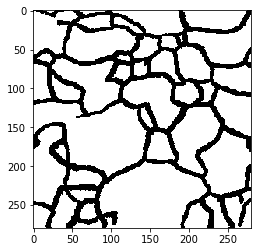

In [0]:
plt.imshow(train_y[-3][:,:,0])

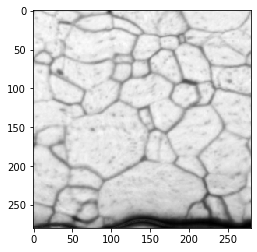

In [0]:
plt.imshow((train_x[-3])[:,:,0])

In [0]:
import keras
train_x = keras.utils.normalize(train_x,axis = 1)
#train_y =  keras.utils.normalize(train_y ,axis = 1)

In [0]:
train_y[-1][:,:,0]

array([[-0., -0., -0., ...,  1.,  1.,  1.],
       [-0., -0., -0., ...,  1.,  1., -0.],
       [ 1., -0., -0., ...,  1.,  1., -0.],
       ...,
       [-0., -0.,  1., ...,  1.,  1.,  1.],
       [-0., -0., -0., ...,  1.,  1.,  1.],
       [ 1., -0., -0., ..., -0., -0., -0.]], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

In [0]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
#X_train=np.array(train_x)
#y_train=np.array(train_y)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
data_gen_args = dict(#featurewise_center=True,
                     #featurewise_std_normalization=True,
                     rotation_range=90,
                     horizontal_flip=True,
                     zoom_range=0.2,
                     width_shift_range=0.1,
                     height_shift_range=0.1,)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)
seed = 1
image_datagen.fit(X_train, augment=True, seed=seed)
mask_datagen.fit(y_train, augment=True, seed=seed)
train_generator = zip(image_datagen.flow(X_train,batch_size=8), mask_datagen.flow(y_train,batch_size=8))

AttributeError: 'zip' object has no attribute 'next'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

from skimage.draw import ellipse, polygon

from keras import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.optimizers import Adam
from keras.layers import BatchNormalization,Dense,ZeroPadding2D, Flatten, Input, UpSampling2D,Conv2D,Cropping2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from keras.losses import binary_crossentropy
import tensorflow as tf
import keras as keras

from keras import backend as K


In [0]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        cw = (target.get_shape()[2] - refer.get_shape()[2]).value
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1]).value
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)
    

def get_unet(patch_height,patch_width,n_ch):
    concat_axis = 3

    inputs = Input((patch_height, patch_width, n_ch))
    
    conv1 = Conv2D(32, (3, 3), padding="same", name="conv1_1", activation="relu", data_format="channels_last")(inputs)
    conv1 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool1)
    conv2 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)

    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool2)
    conv3 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv3)

    conv4 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool3)
    conv4 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv4)

    conv5 = Conv2D(512, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool4)
    conv5 = Conv2D(512, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv5)

    up_conv5 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv5)
    ch, cw = get_crop_shape(conv4, up_conv5)
    crop_conv4 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv4)
    up6   = concatenate([up_conv5, crop_conv4], axis=concat_axis)
    conv6 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(up6)
    conv6 = Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv6)

    up_conv6 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv6)
    ch, cw = get_crop_shape(conv3, up_conv6)
    crop_conv3 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv3)
    up7   = concatenate([up_conv6, crop_conv3], axis=concat_axis)
    conv7 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(up7)
    conv7 = Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv7)

    up_conv7 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv7)
    ch, cw = get_crop_shape(conv2, up_conv7)
    crop_conv2 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv2)
    up8   = concatenate([up_conv7, crop_conv2], axis=concat_axis)
    conv8 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(up8)
    conv8 = Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv8)

    up_conv8 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv8)
    ch, cw = get_crop_shape(conv1, up_conv8)
    crop_conv1 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv1)
    up9   = concatenate([up_conv8, crop_conv1], axis=concat_axis)
    conv9 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(up9)
    conv9 = Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv9)

    ch, cw = get_crop_shape(inputs, conv9)
    conv9  = ZeroPadding2D(padding=(ch[0],cw[0]), data_format="channels_last")(conv9)
    conv10 = Conv2D(1, (1, 1), data_format="channels_last", activation="sigmoid")(conv9)
    
    #flatten =  Flatten()(conv9)
    #Dense1 = Dense(512, activation='relu')(flatten)
    #BN =BatchNormalization() (Dense1)
    #Dense2 = Dense(17, activation='sigmoid')(BN)
    
    model = Model(input=inputs, output= conv10)#=Dense2)
    
    return model


model = get_unet( h, w,1)
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 280, 280, 1)  0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 280, 280, 32) 320         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 280, 280, 32) 9248        conv1_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_21 (MaxPooling2D) (None, 140, 140, 32) 0           conv2d_103[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
model.fit(x =X_train, y= y_train,batch_size=32, epochs=35,validation_data=(X_test,y_test))


Train on 81 samples, validate on 9 samples
Epoch 1/35
81/81 [==============================] - 10s 125ms/step - loss: 0.6911 - acc: 0.8107 - val_loss: 0.6893 - val_acc: 0.8260
Epoch 2/35
81/81 [==============================] - 1s 13ms/step - loss: 0.6887 - acc: 0.8233 - val_loss: 0.6863 - val_acc: 0.8260
Epoch 3/35
81/81 [==============================] - 1s 13ms/step - loss: 0.6850 - acc: 0.8233 - val_loss: 0.6798 - val_acc: 0.8260
Epoch 4/35
81/81 [==============================] - 1s 13ms/step - loss: 0.6761 - acc: 0.8233 - val_loss: 0.6584 - val_acc: 0.8260
Epoch 5/35
81/81 [==============================] - 1s 13ms/step - loss: 0.6426 - acc: 0.8233 - val_loss: 0.5703 - val_acc: 0.8260
Epoch 6/35
81/81 [==============================] - 1s 13ms/step - loss: 0.5327 - acc: 0.8233 - val_loss: 0.5363 - val_acc: 0.8260
Epoch 7/35
81/81 [==============================] - 1s 13ms/step - loss: 0.5314 - acc: 0.8233 - val_loss: 0.4797 - val_acc: 0.8260
Epoch 8/35
81/81 [====================

18


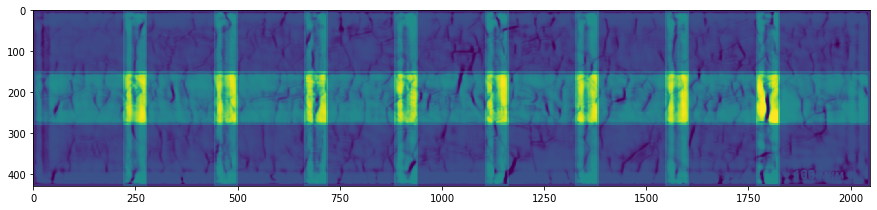

In [0]:
img = np.array(Image.open(path+'test1_x/'+str(7)+'.jpg'))
img = image.img_to_array(img)
img = keras.utils.normalize(img,axis = 1)
k = Im.get_slices_batch(img)
preds = [model.predict(np.array([k1])) for k1 in k['images']]
united = Im.unite_img([k2[0][:,:,0] for k2 in preds])
plt.figure(figsize=(15,15))
plt.imshow(united)
print(len(k['images']))
#plt.imshow(k['images'][5])

In [0]:
preds[0][0].shape

(280, 280, 1)

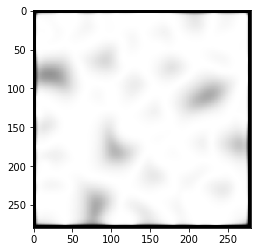

In [0]:
preds = model.predict([k['images']])
plt.imshow(preds[0][:,:,0])

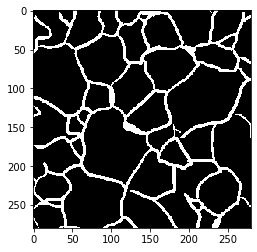

In [0]:
plt.imshow(k['images'][0][:,:,0])

In [0]:
model.fit_generator(train_generator, steps_per_epoch=len(X_train),epochs=55,validation_data=(X_test,y_test))
#steps_per_epoch=len(X_train),

Epoch 1/15
81/81 [==============================] - 36s 439ms/step - loss: 0.5258 - acc: 0.7798 - val_loss: 0.4721 - val_acc: 0.8260
Epoch 2/15
81/81 [==============================] - 28s 343ms/step - loss: 0.4795 - acc: 0.7801 - val_loss: 0.4727 - val_acc: 0.8260
Epoch 3/15
81/81 [==============================] - 28s 344ms/step - loss: 0.4787 - acc: 0.7805 - val_loss: 0.4717 - val_acc: 0.8260
Epoch 4/15
81/81 [==============================] - 28s 344ms/step - loss: 0.4804 - acc: 0.7794 - val_loss: 0.4713 - val_acc: 0.8260
Epoch 5/15
81/81 [==============================] - 28s 344ms/step - loss: 0.4814 - acc: 0.7786 - val_loss: 0.4740 - val_acc: 0.8260
Epoch 6/15
81/81 [==============================] - 28s 344ms/step - loss: 0.4794 - acc: 0.7800 - val_loss: 0.4716 - val_acc: 0.8260
Epoch 7/15
81/81 [==============================] - 28s 343ms/step - loss: 0.4799 - acc: 0.7795 - val_loss: 0.4716 - val_acc: 0.8260
Epoch 8/15
81/81 [==============================] - 28s 343ms/step - 

KeyboardInterrupt: ignored

In [0]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [0]:

import math
import tensorflow as tf
import keras.backend as KB
from keras.models import Model
from keras.engine.topology import Input
from keras.layers.core import Flatten, Dense, Reshape, Dropout, Activation
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers import ZeroPadding2D
from keras.optimizers import Adam
from keras.utils import multi_gpu_model, plot_model
from keras.losses import binary_crossentropy

#from dice_coefficient import dice_coef


class UNetPP(object):
    def __init__(self, input_shape, start_filter=32, depth=4, class_num=1):
        self.__input_shape = input_shape
        self.__class_num = class_num

        inputs = Input(self.__input_shape)

        filters_list = [start_filter * (k + 1) for k in range(depth)]
        layer = inputs
        encode_layers = []
        concat_layers_list = []
        for k, filters in enumerate(filters_list):
            layer = self.__add_encode_layers(filters, layer, is_first=(k==0))
            encode_layers.append(layer)
            concat_layers_list.append([layer])

        add_drop_layer_indexes = [2, 3]
        for base_k, bottom_layer in enumerate(encode_layers[1:]):
            deconv_item = zip(reversed(filters_list[:base_k + 1]), reversed(concat_layers_list[:base_k + 1]))
            sub_layer = bottom_layer
            for k, (filters, concat_layers) in enumerate(deconv_item):
                sub_layer = self.__add_decode_layers(filters, sub_layer, concat_layers
                                                     , add_drop_layer=(k in add_drop_layer_indexes))
                concat_layers_list[base_k - k].append(sub_layer)

        layer = concatenate(concat_layers_list[0][1:])
        outputs = Conv2D(class_num, 1, activation='sigmoid')(layer)

        self.model = Model(inputs=[inputs], outputs=[outputs])


    def __add_encode_layers(self, filter_size, input_layer, is_first=False):
        layer = input_layer
        if is_first:
            layer = Conv2D(filter_size, 3, padding='same', input_shape=self.__input_shape)(layer)
        else:
            layer = MaxPooling2D(2)(layer)
            layer = Conv2D(filter_size, 3, padding='same')(layer)
        layer = BatchNormalization()(layer)
        layer = Activation(activation='relu')(layer)

        layer = Conv2D(filter_size, 3, padding='same')(layer)
        layer = BatchNormalization()(layer)
        layer = Activation(activation='relu')(layer)
        return layer


    def __add_decode_layers(self, filter_size, input_layer, concat_layers, add_drop_layer=False):
        layer = UpSampling2D(2)(input_layer)
        concat_layers.insert(0, layer)
        layer = concatenate(concat_layers)

        layer = Conv2D(filter_size, 3, padding='same')(layer)
        layer = BatchNormalization()(layer)
        layer = Activation(activation='relu')(layer)

        layer = Conv2D(filter_size, 3, padding='same')(layer)
        layer = BatchNormalization()(layer)
        layer = Activation(activation='relu')(layer)

        if add_drop_layer:
            layer = Dropout(0.5)(layer)
        return layer


    def comple_model(self):
        #self.__model.compile(optimizer=Adam(), loss=self.__losses)
        model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])


    def __losses(self, y_true, y_pred):
        # TODO unstack by batch ?
        binx_loss = self.__binary_cross_entropy(y_true, y_pred)
        dice_loss = dice_coef(y_true, y_pred)
        return -1 * (tf.reduce_sum(tf.stack([binx_loss, dice_loss])) / KB.cast(KB.shape(y_true)[0], 'float32'))


    def __binary_cross_entropy(self, y_true, y_pred):
        true_flat = KB.flatten(y_true)
        pred_flat = KB.flatten(y_pred)
        pred_logs = KB.log(pred_flat)
        not_nan_ids = tf.where(tf.equal(tf.is_nan(pred_logs), False))

        not_nan_true_f = KB.gather(true_flat, not_nan_ids)
        not_nan_pred_logs_f = KB.gather(pred_logs, not_nan_ids)
        return KB.sum(not_nan_true_f * not_nan_pred_logs_f / 2)



    def get_model(self, with_comple=False):
        if with_comple:
            self.comple_model()
        return self.__model


    def get_parallel_model(self, gpu_num, with_comple=False):
        self.__model = multi_gpu_model(self.__model, gpus=gpu_num)
        return self.get_model(with_comple)


    def show_model_summary(self):
        self.__model.summary()


    def plot_model_summary(self, file_name):
        plot_model(self.__model, to_file=file_name)

In [0]:
model =  UNetPP.get_model(with_comple=True)

TypeError: get_model() missing 1 required positional argument: 'self'

In [0]:
model =  UNetPP(( h, w,1)).model
#callback = ModelCheckpoint('', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=True, mode='auto', period=1)
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])


In [0]:
model.get_weights

<bound method Network.get_weights of <keras.engine.training.Model object at 0x7f5130698780>>

In [0]:
model.fit(x =X_train, y= y_train,batch_size=8, epochs=24,validation_data=(X_test,y_test))


Train on 891 samples, validate on 99 samples
Epoch 1/24
891/891 [==============================] - 32s 36ms/step - loss: 0.1026 - acc: 0.9560 - val_loss: 1.5100 - val_acc: 0.7656
Epoch 2/24
891/891 [==============================] - 32s 36ms/step - loss: 0.1037 - acc: 0.9557 - val_loss: 0.8079 - val_acc: 0.8225
Epoch 3/24
891/891 [==============================] - 32s 36ms/step - loss: 0.1054 - acc: 0.9549 - val_loss: 0.7561 - val_acc: 0.8091
Epoch 4/24
891/891 [==============================] - 32s 36ms/step - loss: 0.1013 - acc: 0.9566 - val_loss: 0.6496 - val_acc: 0.8392
Epoch 5/24
891/891 [==============================] - 32s 36ms/step - loss: 0.0988 - acc: 0.9577 - val_loss: 0.5941 - val_acc: 0.8514
Epoch 6/24
891/891 [==============================] - 32s 36ms/step - loss: 0.0997 - acc: 0.9573 - val_loss: 0.3669 - val_acc: 0.8935
Epoch 7/24
891/891 [==============================] - 32s 36ms/step - loss: 0.0992 - acc: 0.9575 - val_loss: 0.5716 - val_acc: 0.8547
Epoch 8/24
891/89

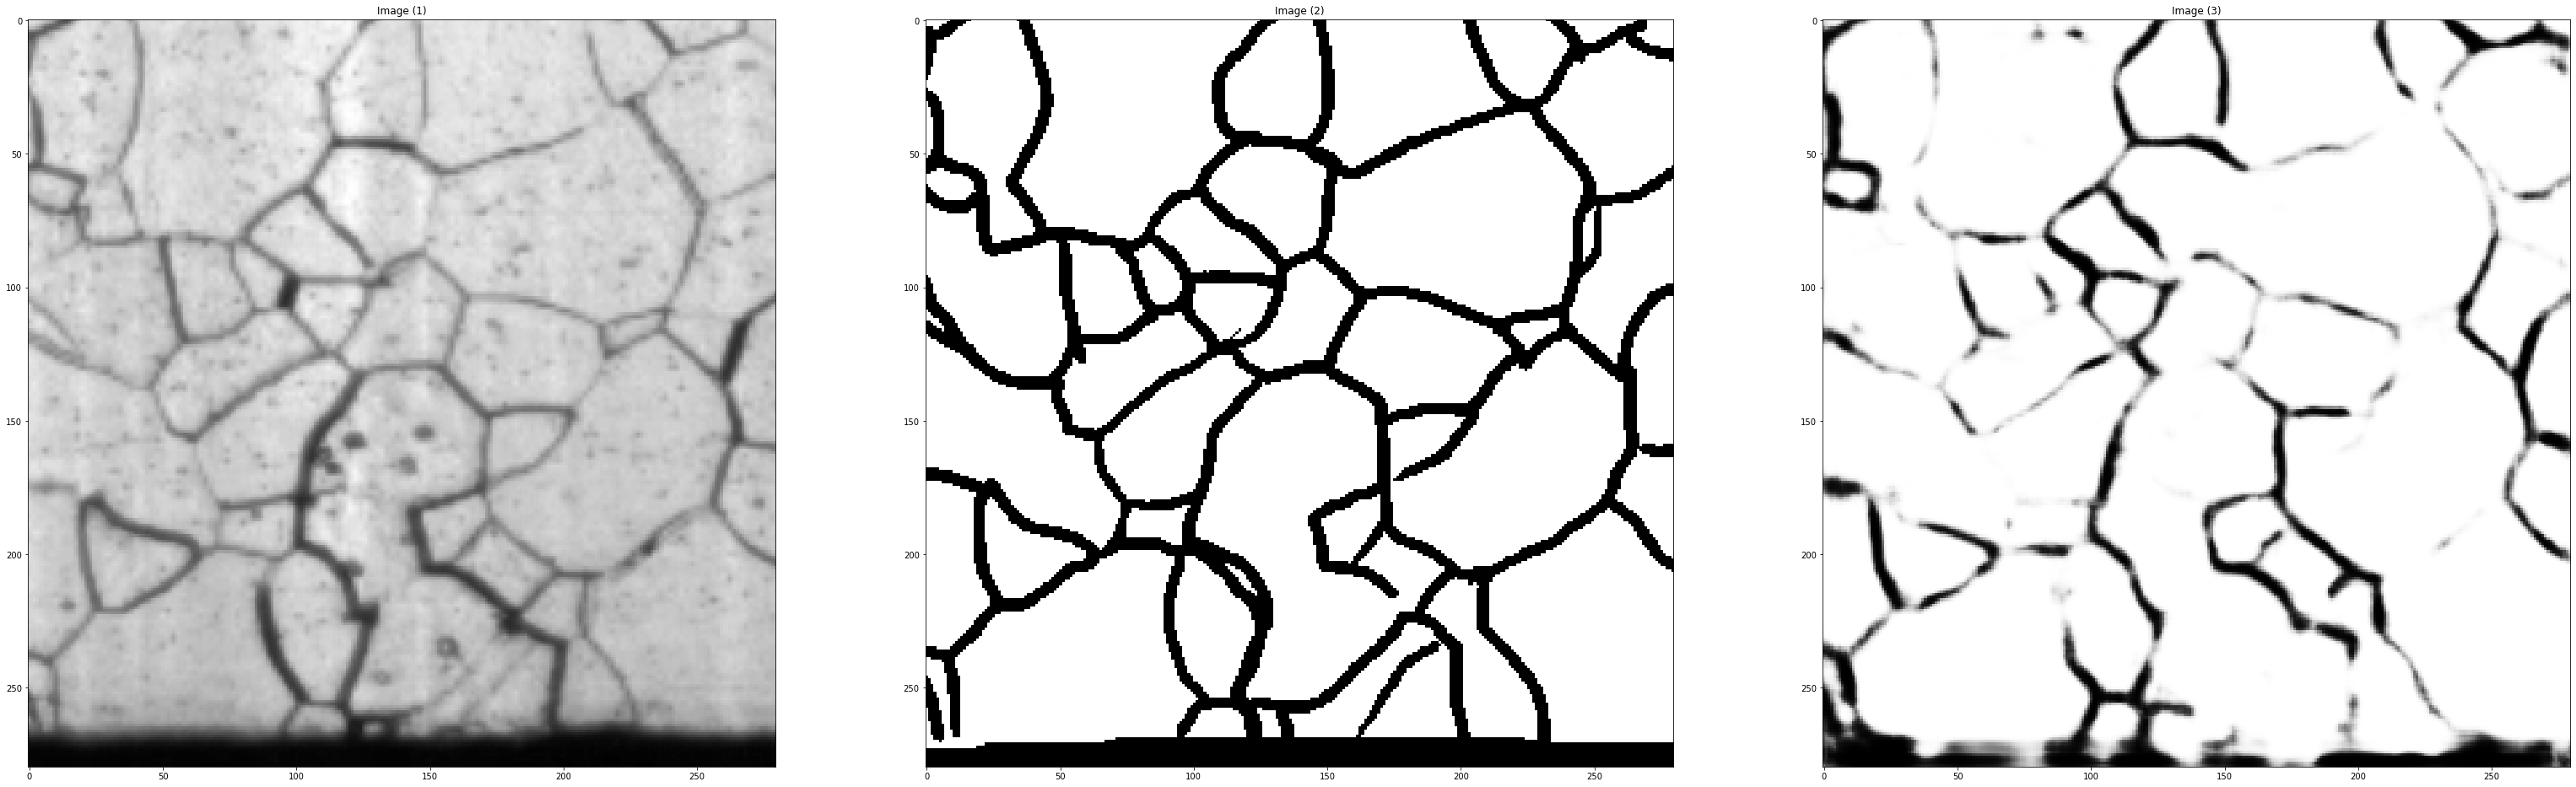

In [0]:

Im.show_images([X_test[0][:,:,0],y_test[0][:,:,0],model.predict(X_test)[0][:,:,0]])

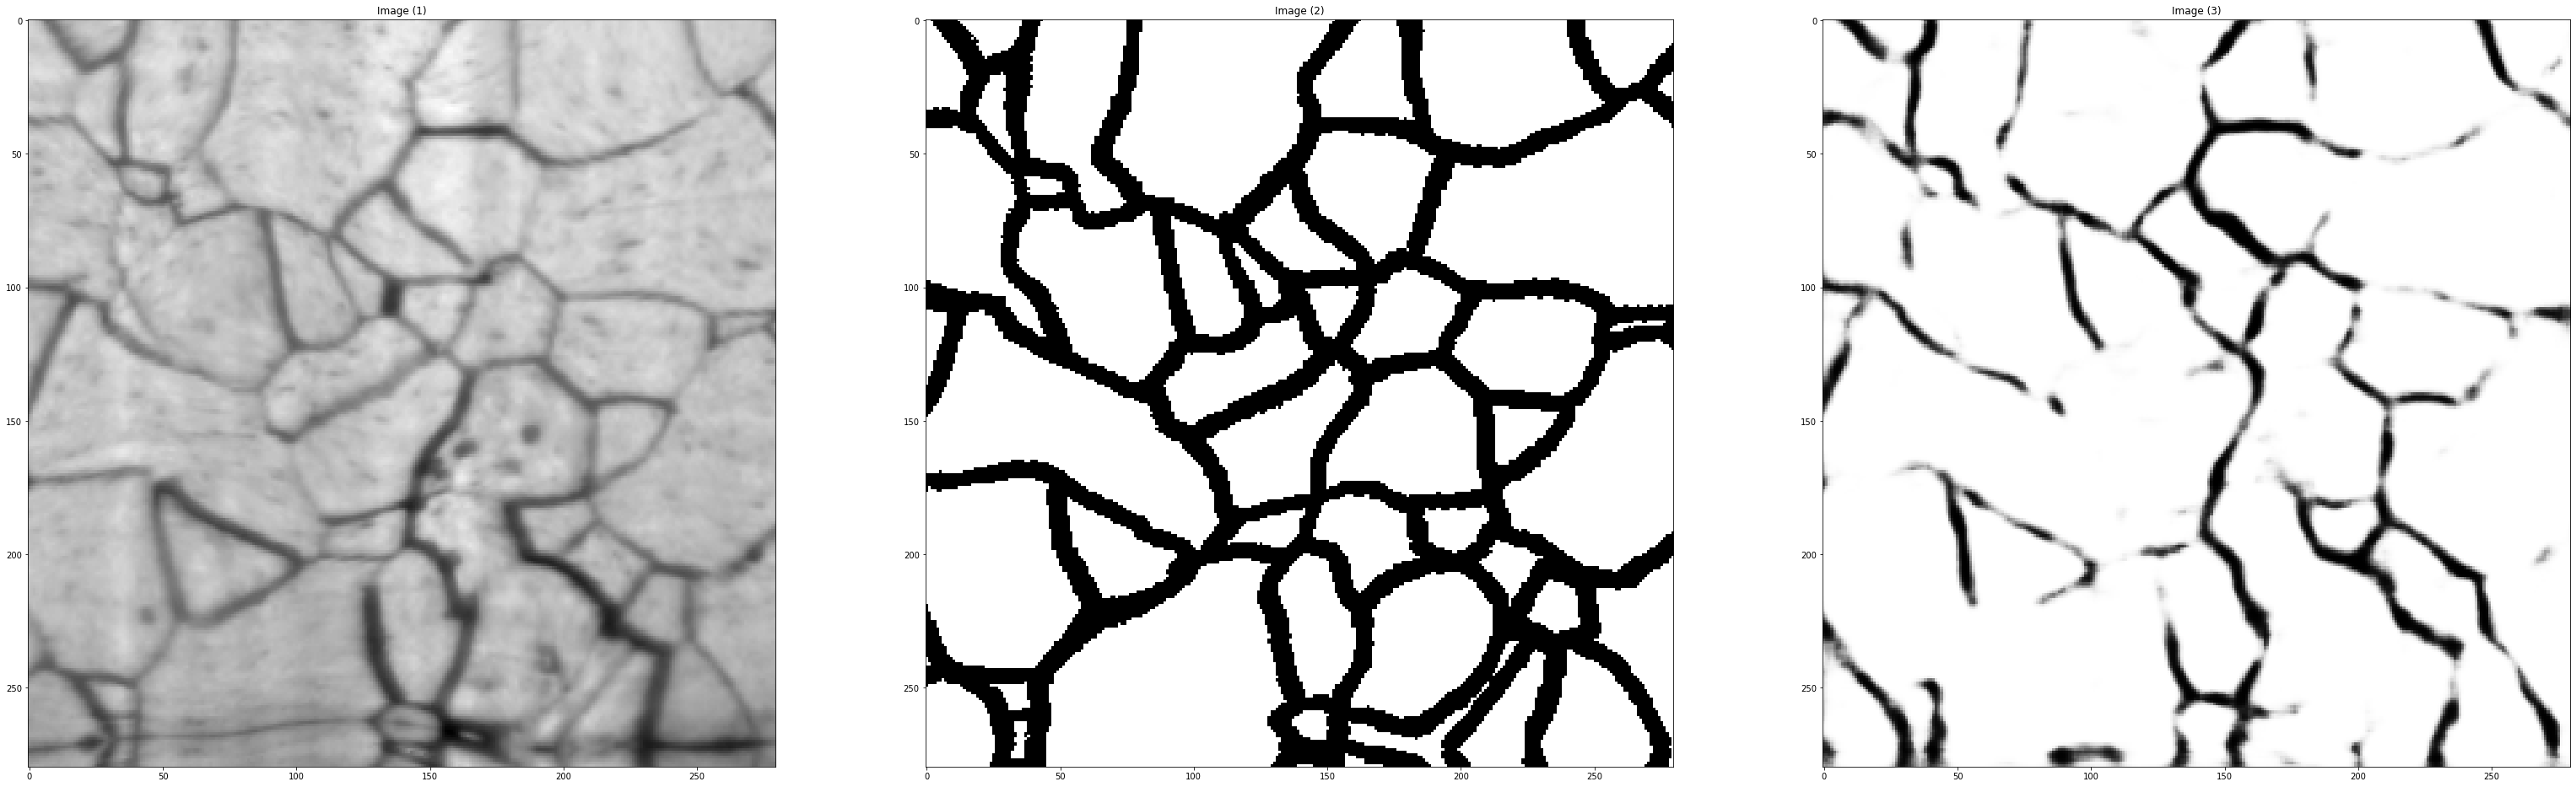

In [0]:
Im.show_images([X_train[-1][:,:,0],y_train[-1][:,:,0],model.predict(X_train)[-1][:,:,0]])

In [0]:
img = np.array(Image.open(path+'test1_x/'+str(7)+'.jpg'))
img = image.img_to_array(img)
img = keras.utils.normalize(img,axis = 1)
k = Im.get_slices_batch(img)
preds = [model.predict(np.array([k1])) for k1 in k['images']]
united = Im.unite_img([k2[0][:,:,0] for k2 in preds])
plt.figure(figsize=(15,15))
plt.imshow(cv2.threshold(united,0,255,cv2.THRESH_BINARY)[1])
print(len(k['images']))
#plt.imshow(k['images'][5])

In [0]:
model.fit_generator(train_generator, steps_per_epoch=len(X_train),epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
81/81 [==============================] - 28s 348ms/step - loss: 0.5231 - acc: 0.7433 - val_loss: 0.4841 - val_acc: 0.8260
Epoch 2/25
81/81 [==============================] - 21s 259ms/step - loss: 0.4761 - acc: 0.7790 - val_loss: 0.4648 - val_acc: 0.8261
Epoch 3/25
81/81 [==============================] - 21s 256ms/step - loss: 0.4745 - acc: 0.7789 - val_loss: 0.4633 - val_acc: 0.8261
Epoch 4/25
81/81 [==============================] - 21s 259ms/step - loss: 0.4720 - acc: 0.7797 - val_loss: 0.4509 - val_acc: 0.8272
Epoch 5/25
81/81 [==============================] - 21s 259ms/step - loss: 0.4702 - acc: 0.7804 - val_loss: 0.4513 - val_acc: 0.8279
Epoch 6/25
81/81 [==============================] - 21s 256ms/step - loss: 0.4696 - acc: 0.7805 - val_loss: 0.4644 - val_acc: 0.8260
Epoch 7/25
81/81 [==============================] - 21s 259ms/step - loss: 0.4718 - acc: 0.7784 - val_loss: 0.4693 - val_acc: 0.8260
Epoch 8/25
81/81 [==============================] - 21s 259ms/step - 

In [0]:

from google.colab import files
class ModelCheckpoint(keras.callbacks.Callback):
    """Save the model after every epoch.
    `filepath` can contain named formatting options,
    which will be filled with the values of `epoch` and
    keys in `logs` (passed in `on_epoch_end`).
    For example: if `filepath` is `weights.{epoch:02d}-{val_loss:.2f}.hdf5`,
    then the model checkpoints will be saved with the epoch number and
    the validation loss in the filename.
    # Arguments
        filepath: string, path to save the model file.
        monitor: quantity to monitor.
        verbose: verbosity mode, 0 or 1.
        save_best_only: if `save_best_only=True`,
            the latest best model according to
            the quantity monitored will not be overwritten.
        save_weights_only: if True, then only the model's weights will be
            saved (`model.save_weights(filepath)`), else the full model
            is saved (`model.save(filepath)`).
        mode: one of {auto, min, max}.
            If `save_best_only=True`, the decision
            to overwrite the current save file is made
            based on either the maximization or the
            minimization of the monitored quantity. For `val_acc`,
            this should be `max`, for `val_loss` this should
            be `min`, etc. In `auto` mode, the direction is
            automatically inferred from the name of the monitored quantity.
        period: Interval (number of epochs) between checkpoints.
    """

    def __init__(self, filepath, monitor='val_loss', verbose=0,
                 save_best_only=False, save_weights_only=False,
                 mode='auto', period=1):
        super(ModelCheckpoint, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.filepath = filepath
        self.save_best_only = save_best_only
        self.save_weights_only = save_weights_only
        self.period = period
        self.epochs_since_last_save = 0

        if mode not in ['auto', 'min', 'max']:
            warnings.warn('ModelCheckpoint mode %s is unknown, '
                          'fallback to auto mode.' % (mode),
                          RuntimeWarning)
            mode = 'auto'

        if mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf
        elif mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf
        else:
            if 'acc' in self.monitor or self.monitor.startswith('fmeasure'):
                self.monitor_op = np.greater
                self.best = -np.Inf
            else:
                self.monitor_op = np.less
                self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            self.model.save_weights(filepath, overwrite=True)
                        else:
                            self.model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    k = self.model.get_weights
                    files.upload("model1.h5")
                else:
                    self.model.save(filepath, overwrite=True)
